In [242]:
import pykat
from pykat.ifo import aligo
import pykat.ifo.aligo.plot
import matplotlib.pyplot as plt
import numpy as np

pykat.init_pykat_plotting()

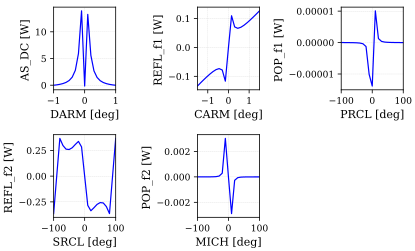

In [243]:
base = aligo.make_kat("design_with_IMC_HAM2_FI_OMC")
base = aligo.setup(base)
base.L0.P = 30.0

#mods
base.SRM.T = .37
base.parse("qshotS NSR_without_RP 1 $fs nAS")
base.parse("qnoisedS NSR_with_RP 1 $fs nAS")

#plot
aligo.plot.error_signals(base, xlimits=(-1, 1), steps=20)

In [244]:
base.IFO.zero_locks()

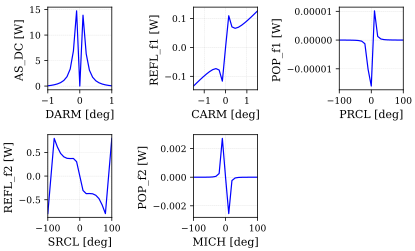

In [253]:
kat = base.deepcopy()
kat.SRM.T = .323

kat.IFO.zero_locks()
aligo.plot.error_signals(kat, xlimits=(-1, 1), steps=20)

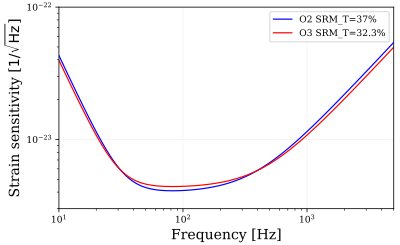

In [255]:
base.IFO.suspend_mirrors_z()

base.parse(base.IFO.DARM.transfer())
base.parse("qnoised noise 1 $fs nAS")
out1 = base.IFO.DARM_h.scan_f(linlog="log", lower=10, upper=5000, steps=100)

kat.parse(kat.IFO.DARM.transfer())
kat.parse("qnoised noise 1 $fs nAS")
out2 = kat.IFO.DARM_h.scan_f(linlog="log", lower=10, upper=5000, steps=100)

ax = plt.subplot(111)
plt.loglog(out1.x, out1['NSR_with_RP'],label="O2 SRM_T=37%")
plt.loglog(out2.x, out2['NSR_with_RP'], label="O3 SRM_T=32.3%")

ax.legend()

plt.xlabel("Frequency [Hz]",fontsize=14)
plt.ylabel("Strain sensitivity [$1/\\sqrt{\mathrm{Hz}}$]",fontsize=14)

plt.ylim(3e-24,1e-22)

plt.savefig('ChangeinSRM_strain.png')

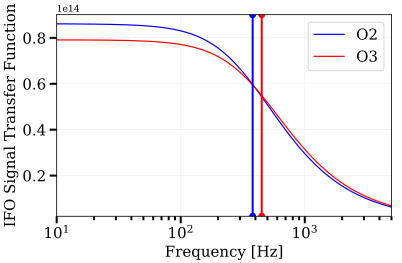

In [247]:
plt.semilogx(out1.x, out1[base.IFO.DARM.transfer_name()],label="O2")
plt.semilogx(out2.x, out2[kat.IFO.DARM.transfer_name()], label="O3")

plt.axvline(x=450,marker='o',linewidth=2, color='r')
plt.axvline(x=380,marker='o',linewidth=2, color='b')

plt.xlabel("Frequency [Hz]",fontsize=15)
plt.ylabel("IFO Signal Transfer Function",fontsize=15)

###Main plot formatting
plt.tick_params(labelsize=15)
plt.tick_params(which='both', width=2)
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=4)
plt.grid(True, zorder=-1)
plt.legend(fontsize=15)

plt.savefig("ChangeinSRM_TF.png")

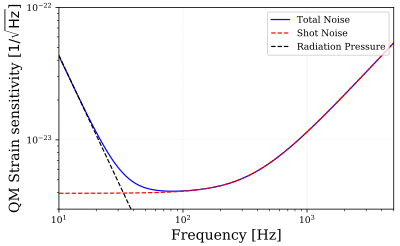

In [270]:
#radiation pressure estimate
def rad_pr(x):
    scale = 4.35e-21
    rad = scale/x**2
    return rad

f = np.linspace(10,5000,100)
rad_press = rad_pr(f)

base.IFO.suspend_mirrors_z()
ax = plt.subplot(111)

#aligo.plot.strain_sensitivity(base, ax=ax)
ax.loglog(out1.x,out1['NSR_with_RP'],label='Total Noise',color='b')
ax.loglog(out1.x,out1['NSR_without_RP'],"--",label='Shot Noise',color='r')
ax.loglog(f,rad_press,"--",label="Radiation Pressure",color='k')
ax.legend(loc=1)

plt.xlabel("Frequency [Hz]",fontsize=14)
plt.ylabel("QM Strain sensitivity [$1/\\sqrt{\mathrm{Hz}}$]",fontsize=14)

plt.ylim(3e-24,1e-22)
plt.savefig("ShotNoise_RP_TotalQM.png")

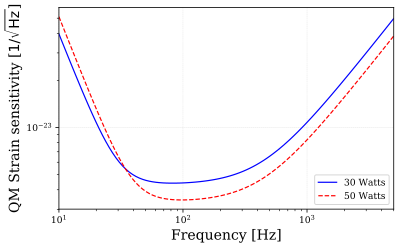

In [269]:
#increasing laser power from 30 Watts to 50 Watts.
kat2= kat.deepcopy()
kat2.parse(base.IFO.DARM.transfer())
kat2.parse("qnoised noise 1 $fs nAS")
kat2.L0.P=30
out2 = kat2.IFO.DARM_h.scan_f(linlog="log", lower=10, upper=5000, steps=100)

kat3= kat.deepcopy()
kat3.parse(base.IFO.DARM.transfer())
kat3.parse("qnoised noise 1 $fs nAS")
kat3.L0.P=50
out3 = kat3.IFO.DARM_h.scan_f(linlog="log", lower=10, upper=5000, steps=100)

ax = plt.subplot(111)
ax.loglog(out1.x,out2['NSR_with_RP'],label='30 Watts',color='b')
ax.loglog(out1.x,out3['NSR_with_RP'],"--",label='50 Watts',color='r')
ax.legend()

plt.xlabel("Frequency [Hz]",fontsize=14)
plt.ylabel("QM Strain sensitivity [$1/\\sqrt{\mathrm{Hz}}$]",fontsize=14)
plt.savefig("30W_50W_Strain.png")


In [250]:
kat3.L0.P

<Param (L0.P=50.0) at 0x1cd9dec0400>